# Analyse $J$-$K$ Model Spectral Data
    Alan Morningstar
    June 2017

#### load the data

In [1]:
using DataFrames

In [2]:
data = readtable("specData/Lx=4_Ly=4_J1=1.0_K=0.0.csv");

#### plot tower of states

In [3]:
using PyPlot
# PyPlot.svg(true);

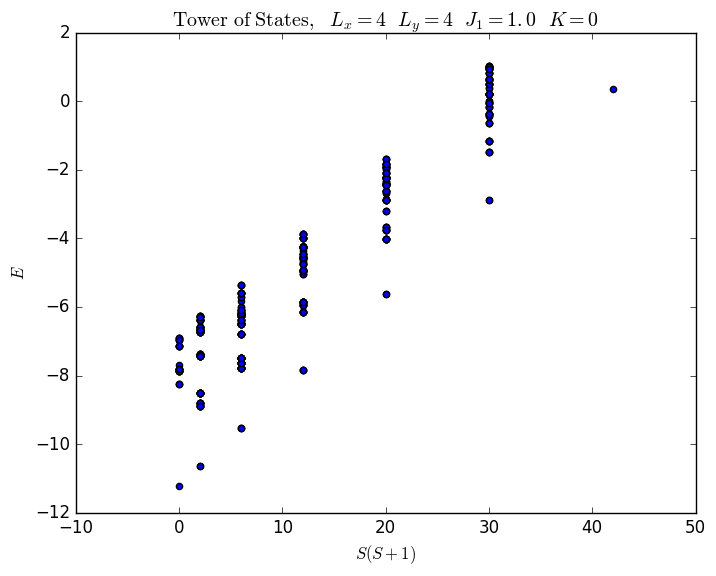

In [6]:
scatter(data[:Ssqrd],data[:E]);
title(L"$\mathrm{Tower\ of\ States,}$  $L_x=4$  $L_y=4$  $J_1=1.0$  $K=0$");
xlabel(L"$S(S+1)$");
ylabel(L"$E$");
# savefig("TOS_Lx=4_Ly=4_J1=1.0_K=0.0.pdf");